# Metric: Speed Humps in Neighborhoods

In [2]:
# import necessary libraries

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
import numpy as np
from math import radians, sin, cos, sin, asin, sqrt, pi

On to a more fun aspect of mario kart, that's the boost! In real life, the boost is represented as speed humps. In order to choose a neighborhood, I went ahead and looked at the number of speed humps in the dataset.

In [3]:
# import the dataset

speed_humps = pd.read_csv("CSV/speedhumps.csv")

speed_humps.head()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


In [4]:
# sees the number of humps in every neighborhood

speed_humps["neighborhood"].value_counts()

Squirrel Hill South    18
Carrick                 9
Polish Hill             6
North Oakland           6
Homewood South          4
South Side Slopes       4
Upper Hill              4
Perry North             4
Brookline               4
Garfield                3
Bloomfield              3
Mount Washington        3
Squirrel Hill North     3
South Side Flats        3
Highland Park           2
Overbrook               1
Stanton Heights         1
Central Oakland         1
Name: neighborhood, dtype: int64

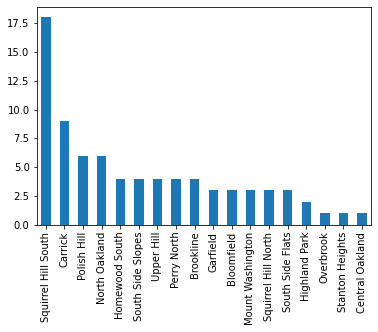

In [5]:
speed_humps["neighborhood"].value_counts().plot.bar()

As we can see here, there is a large disparity with how speed humps are distributed within the cities. Squirrel Hill South has 18 and the next one is 9 (Carrick). There are even some neighborhoods that only have 1. Of course there are many neighborhoods not included within the dataset, but that does not mean that the other neighborhoods do not have speed humps, but simply is not documented within this dataset.

In [6]:
def calculate_distance(lat1, long1, lat2, long2):
    degree = pi/180
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    long1 = radians(long1)
    long2 = radians(long2)
    
    # Haversine formula
    dlon = long2 - long1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. 
    r = 6371
      
    # calculate the result
    return(c * r)

In [7]:
neighborhoods = speed_humps.neighborhood.unique()
averages = []

for n in neighborhoods:
    temp = speed_humps[speed_humps.neighborhood == n]
    total = 0
    total_sum = 0
    for i in range(0, len(temp)):
        for t in range(i, len(temp)):
            total_sum = total_sum + calculate_distance(temp.iloc[i][14], temp.iloc[i][15], temp.iloc[t][14], temp.iloc[t][15])
            total = total + 1
    averages.append(total_sum/total)

In [8]:
averages, neighborhoods = zip(*sorted(zip(averages, neighborhoods)))

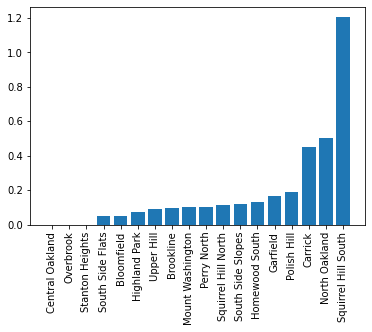

In [9]:
plt.bar(neighborhoods, averages)

plt.xticks(rotation=90,
           horizontalalignment="center")
plt.show()

Here are the average distances between all the speed humps. Of course, where there is only 1 speed hump, the average distance is 0. And it seems to basically flip the previous graph, while Squirrel Hill has the highest number of speed humps, it also has the greatest distance between them.

With the data collected of speed humps and comparing the number of speed humps and the average distances between the every speed hump, I was able to determine what neighborhoods would lead to more boosts on a longer time interval which would be best for in real life Mario Kart.

The top 5 neighborhoods I can conclude are the best for this metric are:
1. Squirrel Hill South - with 18 speed humps and the greatest average distance
2. Carrick - with 9 speed humps and a high average distance
3. North Oakland - with 6 speed humps and a high average distance
4. Polish Hills - 6 with a relatively low average distance
5. Southside Slopes - 4 with a relatively low average distance